<a href="https://colab.research.google.com/github/manuelalarzabal/proyecto-autos-electricos-DELUCA-AZAR-LARZABAL/blob/main/PROYECTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 3)

## Se obtienen los valores de las ventas de autos de Noruega

- Year - year of sales 
- Month - month of sales
- Quantity - total number of units sold
- Quantity_YoY - change YoY in units
- Import - total number of units imported (used cars)
- Import_YoY - change YoY in units
- Used - total number of units owner changes inside the country (data available from 2012)
- Used_YoY - change YoY in units
- Avg_CO2 - average CO2 emission of all cars sold in a given month (in g/km)
- Bensin_CO2 - average CO2 emission of bensin-fueled cars sold in a given month (in g/km)
- Diesel_CO2 - average CO2 emission of diesel-fueled cars sold in a given month (in g/km)
- Quantity_Diesel - number of diesel-fueled cars sold in the country in a given month
- DieselShare - share of diesel cars in total sales (QuantityDiesel / Quantity)
- DieselShareLY - share of diesel cars in total sales a year ago
- Quantity_Hybrid - number of new hybrid cars sold in the country (both PHEV and BV)
- Quantity_Electric - number of new electric cars sold in the country (zero emission vehicles)
- Import_Electric - number of used electric cars imported to the country (zero emission vehicles)

In [ ]:
df_car_sales_norway = pd.read_csv(r'norway_new_car_sales_by_month.csv')
df_car_sales_norway.columns
df_car_sales_norway.head(3)
ym = df_car_sales_norway.apply(lambda x: str(int(x['Year']))+str(int(x['Month'])) ,axis=1)
df_car_sales_norway['yyyymm'] = ym
df_car_sales_norway

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,yyyymm
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN,20071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2017,1,13055,2064,1549,330,36078.0,4047.0,84,94,118,3433,26.3,38.0,4419.0,2295.0,494.0,20171


In [ ]:
df_car_sales_norway[['Year','Month']].groupby(['Year']).count()

,Month
Year,
2007,12
...,...
2017,1


In [ ]:
# Se puede ver que el año 2017 solo tiene un mes, se va a filtrar solo hasta el 2016
df_car_sales_norway = df_car_sales_norway.loc[df_car_sales_norway['Year']<2017,:]

In [ ]:
sales = df_car_sales_norway[['yyyymm','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']].groupby(['yyyymm']).sum()
sales.head(3)

,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
yyyymm,,,
20071,0.0,0.0,10072
200710,0.0,0.0,8967
200711,0.0,0.0,7683


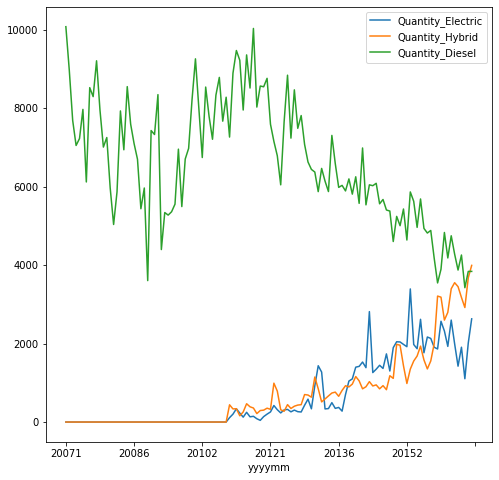

In [ ]:
sales.plot(figsize=(8, 8))

## Se obtienen los valores de polución de Oslo

In [ ]:
# Fuente: https://luftkvalitet.nilu.no/historikk

# Medidas en µg/m³
norway_pollution = pd.read_csv(r'norway_pollution.csv',sep=';', decimal=",")
cols = ['Date','NO','Coverage_NO','NO2','Coverage_NO2','NOx','Coverage_NOx','PM1','Coverage_PM1','PM10','Coverage_PM10','PM2.5','Coverage_PM2.5']
norway_pollution.columns = cols

norway_pollution['Date'] = norway_pollution['Date'].apply(lambda x: str(x).replace('.','-'))
norway_pollution['Date'] = pd.to_datetime(norway_pollution['Date'],format='%d-%m-%Y %H:%M') 

norway_pollution['Year'] = pd.DatetimeIndex(norway_pollution['Date']).year
norway_pollution['Month'] = pd.DatetimeIndex(norway_pollution['Date']).month

norway_pollution['NO'].astype(float)
norway_pollution['NO2'].astype(float)
norway_pollution['NOx'].astype(float)
norway_pollution['PM1'].astype(float)
norway_pollution['PM10'].astype(float)
norway_pollution['PM2.5'].astype(float)

ym = norway_pollution.apply(lambda x: str(int(x['Year']))+str(int(x['Month'])) ,axis=1)
norway_pollution['yyyymm'] = ym

norway_pollution.head(3)

,Date,NO,Coverage_NO,NO2,Coverage_NO2,NOx,Coverage_NOx,PM1,Coverage_PM1,PM10,Coverage_PM10,PM2.5,Coverage_PM2.5,Year,Month,yyyymm
0,2007-01-01,158.513704,99,69.664315,99.0,311.881954,99,NaN,NaN,36.213315,99.0,21.339237,99.0,2007,1,20071
1,2007-02-01,92.943563,99,53.958982,99.0,195.968862,99,NaN,NaN,25.469173,99.0,16.278195,99.0,2007,2,20072
2,2007-03-01,64.818805,76,52.085589,76.0,151.148682,76,NaN,NaN,49.421622,99.0,NaN,32.0,2007,3,20073


In [ ]:
norway_pollution[['Year','Month']].groupby(['Year']).count()

,Month
Year,
2007,12
...,...
2018,12


In [ ]:
# Al igual que el anterior, se va a filtrar solo hasta el 2016
norway_pollution = norway_pollution.loc[norway_pollution['Year']<2017,:]

In [ ]:
df_pollutant = norway_pollution[['yyyymm','NO','NO2','NOx','PM1','PM10','PM2.5']]
df_pollutant = df_pollutant.groupby(['yyyymm']).mean() 
df_pollutant = df_pollutant.fillna(0)
df_pollutant.head(3)

,NO,NO2,NOx,PM1,PM10,PM2.5
yyyymm,,,,,,
20071,158.513704,69.664315,311.881954,0.0,36.213315,21.339237
200710,83.067935,47.385734,174.311821,0.0,27.250720,12.427754
200711,131.184344,59.166291,259.618054,0.0,34.085554,14.652720


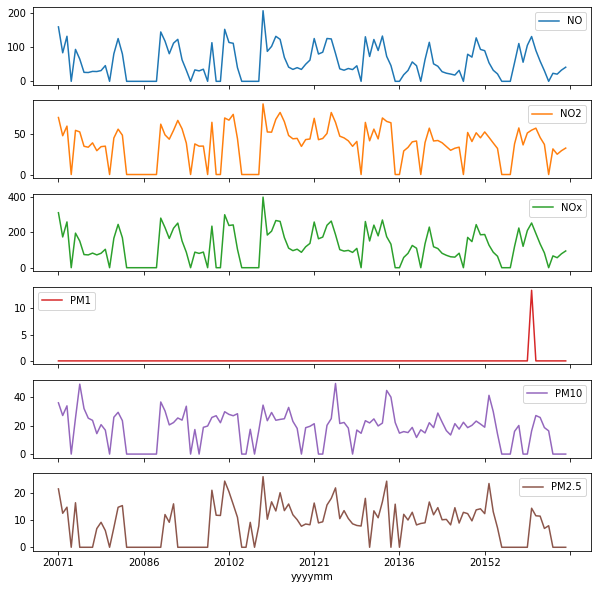

In [ ]:
df_pollutant.plot(subplots=True, figsize=(10, 10));

## Se juntan los datasets

In [ ]:
df_all = norway_pollution.merge(sales, how='inner', left_on=["yyyymm"],right_on=["yyyymm"])


df_all = df_all[["yyyymm",'Year','NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']]
df_all = df_all.fillna(0)
df_all.head(3)

,yyyymm,Year,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
0,20071,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,10072
1,20072,2007,92.943563,53.958982,195.968862,25.469173,16.278195,0.0,0.0,7222
2,20073,2007,64.818805,52.085589,151.148682,49.421622,0.000000,0.0,0.0,7965


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

val_to_scaler = df_all[['NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']]
scaler.fit(val_to_scaler)
vals = scaler.transform(val_to_scaler)

df_scaled = pd.DataFrame(vals)
df_scaled.columns = ['NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']
df_scaled.insert(0,'Year',df_all['Year'])
df_scaled


,Year,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
0,2007,2.201182,1.438954,2.060623,1.500093,1.803268,-0.783322,-0.749201,2.205481
...,...,...,...,...,...,...,...,...,...
119,2016,1.603944,0.771195,1.432430,-0.153092,0.806241,1.876466,1.927965,-1.133243


In [ ]:
df_pollutant_sales = df_scaled.groupby(['Year']).mean() 
df_pollutant_sales


,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
Year,,,,,,,,
2007,0.098799,0.179070,0.121003,0.607922,-0.186554,-0.783322,-0.749201,0.888002
...,...,...,...,...,...,...,...,...
2016,0.066119,0.062257,0.066627,-0.648956,-0.596316,1.534004,2.508860,-1.615086


In [ ]:
pd.set_option("display.max_rows",100)
matriz_corr = df_pollutant_sales.corr()
matriz_corr["Quantity_Electric"].sort_values(ascending=False)
#Basándonos en la correlación y en el impacto de la contaminación de los autos en las distintas medidas de polución, usaremos el NO como variable

Quantity_Electric    1.000000
Quantity_Hybrid      0.880376
PM2.5               -0.014943
NO2                 -0.015678
NOx                 -0.081211
NO                  -0.109724
PM10                -0.278977
Quantity_Diesel     -0.800134
Name: Quantity_Electric, dtype: float64

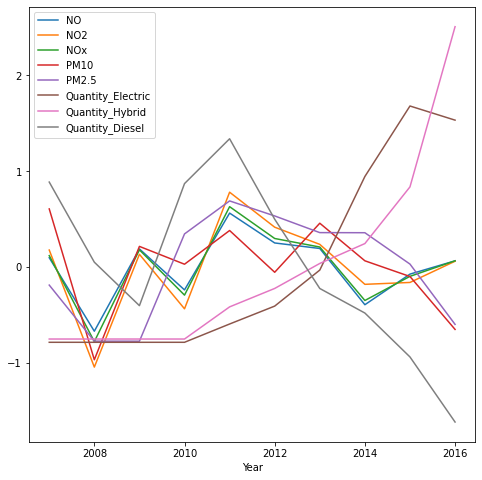

In [ ]:
df_pollutant_sales.plot(figsize=(8, 8))

# CRUZAMOS NO2 CON QUANTITY ELECTRIC POR MESES

In [ ]:
df_casifinal = df_all[["yyyymm","NO","Quantity_Electric"]]
df_casifinal

,yyyymm,NO,Quantity_Electric
0,20071,158.513704,0.0
1,20072,92.943563,0.0
2,20073,64.818805,0.0
3,20074,26.107821,0.0
4,20075,25.642005,0.0
...,...,...,...
115,20168,32.599106,2014.0
116,20169,41.075210,2629.0
117,201610,55.587123,1861.0
118,201611,104.748250,2567.0


In [ ]:
# Otra forma de hacer lo anterior
df_final = df_casifinal.loc[df_casifinal['Quantity_Electric']>0,:].copy()
df_final.head(3)

,yyyymm,NO,Quantity_Electric
48,20111,205.520704,112.0
49,20112,122.191928,124.0
50,20113,69.664324,248.0


In [ ]:
df_ceros = df_casifinal[["Quantity_Electric"]]==0
df_sinceros = df_ceros.drop(df_ceros[df_ceros['Quantity_Electric']==True].index)
df_sinceros #averiugamos que filas de ventas de autos eléctricos tenían cero (no estaban a la venta todavia) y las sacamos

,Quantity_Electric
48,False
49,False
50,False
51,False
52,False
53,False
54,False
55,False
56,False
57,False


In [ ]:
df_final=df_casifinal.iloc[48:120]
df_final

,yyyymm,NO,Quantity_Electric
48,20111,205.520704,112.0
49,20112,122.191928,124.0
50,20113,69.664324,248.0
51,20114,41.345556,133.0
52,20115,34.739470,146.0
53,20116,39.791125,84.0
54,20117,34.696071,43.0
55,20118,49.752424,138.0
56,20119,61.766966,201.0
57,201110,87.200881,201.0


In [ ]:
from os import replace
#cambiar valores cero por mediana
median = df_final["NO"].median()
df_final=df_final.replace([0],[50.3]) # option 3



In [ ]:
NO=df_final.iloc[:,1]
NO

48     205.520704
49     122.191928
50      69.664324
51      41.345556
52      34.739470
53      39.791125
54      34.696071
55      49.752424
56      61.766966
57      87.200881
58     101.692718
59     131.001862
60     124.577470
61     123.424898
62      81.068968
63      36.350513
64      32.356043
65      37.339808
66      34.229609
67      45.279389
68      50.300000
69      79.493287
70      84.810257
71     124.722708
72     129.766490
73     131.860934
74      72.641925
75      45.967827
76      50.300000
77      50.300000
78      19.178505
79      31.575800
80      56.438022
81      72.279877
82     121.751656
83      89.695776
84      45.505975
85      50.880298
86      43.943886
87      28.054697
88      23.662012
89      21.180304
90      18.211749
91      31.956064
92      50.300000
93      50.300000
94      63.340227
95     113.638682
96      78.863165
97      89.189606
98      54.126946
99      32.267607
100     21.630754
101     50.300000
102     50.300000
103     50

In [ ]:
Quantity_electric=df_final.iloc[:,2]
Quantity_electric

48      112.0
49      124.0
50      248.0
51      133.0
52      146.0
53       84.0
54       43.0
55      138.0
56      201.0
57      201.0
58      338.0
59      228.0
60      257.0
61      309.0
62      322.0
63      260.0
64      304.0
65      264.0
66      256.0
67      428.0
68      583.0
69      421.0
70      314.0
71      232.0
72      337.0
73      334.0
74      343.0
75      494.0
76      348.0
77      372.0
78      278.0
79      700.0
80     1044.0
81      925.0
82     1434.0
83     1273.0
84     1099.0
85     1385.0
86     2813.0
87     1260.0
88     1346.0
89     1446.0
90     1365.0
91     1736.0
92     1300.0
93     1398.0
94     1418.0
95     1528.0
96     1895.0
97     1919.0
98     3391.0
99     1975.0
100    1868.0
101    2617.0
102    1764.0
103    2166.0
104    2130.0
105    2045.0
106    2040.0
107    1978.0
108    1906.0
109    1927.0
110    2597.0
111    1993.0
112    1423.0
113    1906.0
114    1103.0
115    2014.0
116    2629.0
117    1861.0
118    2567.0
119   

In [ ]:
type(Quantity_electric) #entonces en necesario pasarlo a array para hacer el modelo

pandas.core.series.Series

In [ ]:
list_per = range(len(df_final))
df_final.loc[:,['Periodo']] = list_per
df_final['Periodo'] = df_final['Periodo']+1
df_final.head(3)

,yyyymm,NO,Quantity_Electric,Periodo
48,20111,205.520704,112.0,1
49,20112,122.191928,124.0,2
50,20113,69.664324,248.0,3


# Predicción ventas período 85
85 : 1 de enero 2018


In [ ]:
import numpy as np
x1 = df_final.iloc[:,3]
x1_array = np.array(x1).reshape(-1,1)
x1_array

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72]])

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
lin_reg1 = LinearRegression()
lin_reg1.fit(x1_array,Quantity_electric)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

predictions1 = lin_reg1.predict(x1_array)
predictions1
lin_mse = mean_squared_error(x1_array,Quantity_electric)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1389.74191748764

In [ ]:
print("Predictions sales:", lin_reg1.predict([[58]])) #probando modelo para predecir las ventas

Predictions sales: [1925.14570605]


In [ ]:
print("Predictions sales:", lin_reg1.predict([[85]])) #cantidad de ventas esperadas para el período 85

Predictions sales: [2913.32287178]


# Predicción de la contaminación en el período 85

In [ ]:
import numpy as np

x=df_final[['Periodo','Quantity_Electric']] #independiente
y=df_final[['NO']]
#x_array= np.array(x).reshape(-1,1)
y_array= np.array(y).reshape(-1,1)


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y_array)



LinearRegression()

In [ ]:
# Veamos como nos da la predicción en alguno de los datos de entrenamiento:
some_data = x.iloc[:5]
some_labels = y.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))

Predictions: [[78.76641089]
 [78.34689029]
 [78.3603447 ]
 [77.44986136]
 [77.03420661]]


In [ ]:
print("Labels:", some_labels)

Labels:             NO
48  205.520704
49  122.191928
50   69.664324
51   41.345556
52   34.739470


In [ ]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(x)
predictions
lin_mse = mean_squared_error(y_array,predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

36.869283454533075

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, predictions)
lin_mae

30.222504363009065

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 6, include_bias = False)
x_2     = poly_2.fit_transform(x)

lin_reg2 = LinearRegression(fit_intercept = True)
lin_reg2.fit(x_2, y)

# Obtención de los parametros de ajuste
print('w_1', lin_reg2.coef_[0][0])
print('w_2', lin_reg2.coef_[0][1])
print('R^2', lin_reg2.score(x_2, y))

w_1 -1.3321835222063454e-06
w_2 1.1908696915490499e-06
R^2 0.24335598895811728


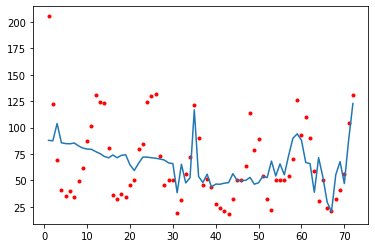

In [ ]:
#x_p = [[i] for i in range(2014, 2018)]
y_2 = lin_reg2.predict(poly_2.fit_transform(x))

plt.plot(x['Periodo'].values, y.values, 'r.', label = 'Datos')
plt.plot(x['Periodo'].values, y_2, label = 'Modelo 2')
#plt.legend(loc = 2)

In [ ]:
#PREDICCIÓN FINAL
print("Predictions:", lin_reg.predict([[85,2913]])) #modelo contaminación usando predicción de ventas 

Predictions: [[50.45814651]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
